<a href="https://colab.research.google.com/github/Vishy-A/DeepLearning/blob/main/HW2/4106HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [11]:

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA (GPU) is available.")
else:
    device = torch.device("cpu")
    print("CUDA (GPU) is not available. Using CPU.")


CUDA (GPU) is available.


In [12]:
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.4915, 0.4823, 0.4468),
                           (0.2470, 0.2435, 0.2616))
    ]))

trainloader = torch.utils.data.DataLoader(cifar10, batch_size=32, shuffle=True)
valloader = torch.utils.data.DataLoader(cifar10_val, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [13]:

class AlexNet(nn.Module):
    def __init__(self, num_classes = 10):
        super(AlexNet, self). __init__()
        self.layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
          x = self.layers(x)
          x = torch.flatten(x, 1)
          return x

In [14]:
classes = 10
epochs = 20
lr = .001

model = AlexNet(classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)


In [15]:
steps = len(trainloader)
trainingloss = []
validationloss = []
valacc = []


In [16]:
for epoch in range(epochs):
    trainloss = 0;
    valloss = 0;
    correct = 0;
    total = 0;

    model.train()
    for images, labels in trainloader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        trainloss = trainloss + loss.item()

    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            valloss = valloss + loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valacc.append(100 * correct / total)
    valloss = valloss / len(valloader)
    trainloss = trainloss / len(trainloader)

    print('Epoch: {}/{}'.format(epoch+1, epochs))
    print('Training Loss: {:.4f}'.format(trainloss))
    print('Validation Loss: {:.4f}'.format(valloss))





Epoch: 1/20
Training Loss: 2.2999
Validation Loss: 2.2956
Epoch: 2/20
Training Loss: 2.2880
Validation Loss: 2.2741
Epoch: 3/20
Training Loss: 2.2272
Validation Loss: 2.1336
Epoch: 4/20
Training Loss: 2.0681
Validation Loss: 1.9683
Epoch: 5/20
Training Loss: 1.9499
Validation Loss: 1.8716
Epoch: 6/20
Training Loss: 1.8642
Validation Loss: 1.7863
Epoch: 7/20
Training Loss: 1.7784
Validation Loss: 1.6898
Epoch: 8/20
Training Loss: 1.6938
Validation Loss: 1.6143
Epoch: 9/20
Training Loss: 1.6335
Validation Loss: 1.5646
Epoch: 10/20
Training Loss: 1.5926
Validation Loss: 1.5319
Epoch: 11/20
Training Loss: 1.5584
Validation Loss: 1.5097
Epoch: 12/20
Training Loss: 1.5263
Validation Loss: 1.4750
Epoch: 13/20
Training Loss: 1.5018
Validation Loss: 1.4437
Epoch: 14/20
Training Loss: 1.4803
Validation Loss: 1.4488
Epoch: 15/20
Training Loss: 1.4565
Validation Loss: 1.4147
Epoch: 16/20
Training Loss: 1.4374
Validation Loss: 1.3898
Epoch: 17/20
Training Loss: 1.4145
Validation Loss: 1.3707
Epoch:

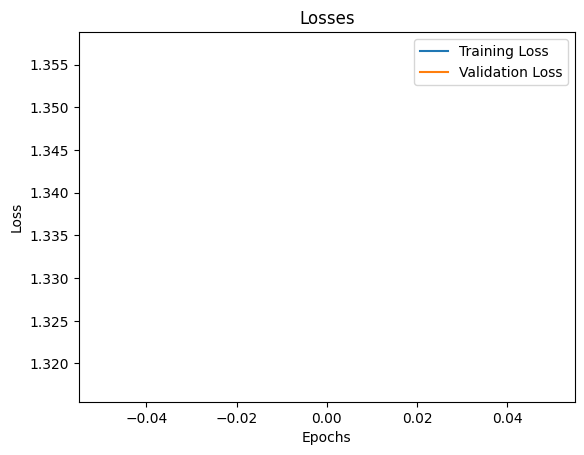

In [17]:
plt.plot(trainloss, label='Training Loss')
plt.plot(valloss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses')
plt.legend()
plt.show()